In [43]:
%reload_ext autoreload
%autoreload 2

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from spyglass.common.nwb_helper_fn import (estimate_sampling_rate, get_data_interface,
                            get_electrode_indices, get_nwb_file,
           
                                           get_valid_intervals, invalid_electrode_index)

In [8]:
from spyglass.common.common_nwbfile import AnalysisNwbfile, Nwbfile

In [27]:
import os
import logging
import sys
from rec_to_nwb.processing.builder.nwb_file_builder import NWBFileBuilder
from rec_to_binaries import extract_trodes_rec_file
from rec_to_nwb.processing.builder.raw_to_nwb_builder import RawToNWBBuilder
from rec_to_nwb.processing.metadata.metadata_manager import MetadataManager
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'rec_to_nwb'

In [59]:
nwb_file_name='/opt/stelmo/nwb/raw/molly20220415.nwb'

In [62]:

io = pynwb.NWBHDF5IO(nwb_file_name,'r')
nwbf = io.read()

In [61]:
epochs = nwbf.epochs.to_dataframe()
epochs

,start_time,stop_time,tags
id,,,
0,1.650046e+09,1.650048e+09,[01_SeqSleep1]
1,1.650049e+09,1.650050e+09,[02_SeqSession1]
2,1.650050e+09,1.650052e+09,[03_SeqSleep2]
3,1.650052e+09,1.650054e+09,[04_Seq2Session1]
4,1.650054e+09,1.650057e+09,[05_Seq2Sleep2]
5,1.650057e+09,1.650059e+09,[06_Seq2Session2]
6,1.650059e+09,1.650061e+09,[07_Seq2Sleep3]
7,1.650061e+09,1.650063e+09,[08_Seq2Session3]
8,1.650063e+09,1.650065e+09,[09_Seq2Sleep4]


In [11]:
nwb_file_abspath = Nwbfile.get_abs_path(nwb_file_name)
nwbf = get_nwb_file(nwb_file_abspath)

In [12]:
epochs = nwbf.epochs.to_dataframe()
epochs

,start_time,stop_time,tags
id,,,
0,1.650224e+09,1.650226e+09,[01_Seq2Sleep1]
1,1.650228e+09,1.650230e+09,[03_Seq2Sleep2]
2,1.650232e+09,1.650235e+09,[05_Seq2Sleep3]
3,1.650237e+09,1.650238e+09,[07_Seq2Sleep4]
4,1.650240e+09,1.650242e+09,[09_Seq2Sleep5]
5,1.650244e+09,1.650246e+09,[11_Seq2Sleep6]
6,1.650226e+09,1.650228e+09,[02_Seq2Session1]
7,1.650230e+09,1.650232e+09,[04_Seq2Session2]
8,1.650235e+09,1.650236e+09,[06_Seq2Session3]


In [55]:
start_time=epochs['start_time']
stop_time=epochs['stop_time']

In [56]:
stop_time-start_time

id
0     1812.943919
1     2190.048255
2     2307.871309
3     2239.901949
4     1817.085907
5     2303.919315
6     1865.817050
7     2374.415503
8     2411.627955
9     2574.181352
10    2767.757461
11    2347.607811
12    1840.523959
dtype: float64

In [21]:
epochs['start_time'][0]

1650224170.8737817

In [47]:
rawdata = nwbf.get_acquisition()

In [48]:
timestamps=np.asarray(rawdata.timestamps)

In [25]:
valid_times=get_valid_intervals(np.asarray(rawdata.timestamps), 30000,
                                                               1.75, 0)

KeyboardInterrupt: 

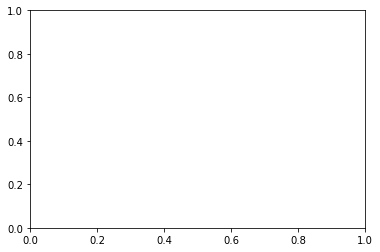

In [58]:
plt.plot(timestamps)

In [51]:
np.all(np.diff(timestamps) > 0)

False

In [35]:
sampling_rate=30000
gap_proportion=1.75
timestamps = timestamps[~np.isnan(timestamps)]
    # find gaps
gap = np.abs(np.diff(timestamps)) > 1.0 / sampling_rate * gap_proportion

    # all true entries of gap represent gaps. Get the times bounding these intervals.
gapind = np.asarray(np.where(gap))

In [36]:
gapind

array([[ 57957039, 108054304, 173074440, 224448432, 277837265, 389406689,
        452212473, 508272345, 560500481]])

In [16]:
estimate_sampling_rate(np.asarray(rawdata.timestamps[:int(1e6)]), 1.5)

30000.0